In [1]:
# 2022-10-04 17:48 Фр
# data_reader
# Решил пока жду архивацию на внеш жест диск повторить sktime,
# который начал прорабатывать на UBUNTU вчера, когда загружал стоимость бренда и золота

# https://pandas-datareader.readthedocs.io/en/latest/index.html
# 
# 2022-10-05 10:15 Фр. файл "TS_brent_gold_2.ipynb" анализ временных рядов стоимости нефти и золота

# 2022-10-05 15:25 перешел в UBUNTU. Все эксперементы оставил в вар 1. От сюда все вычистил.

# 2022-10-05 09:50 Фр. файл "TS_commodity_1.ipynb" собираю данные по биржкыфм товарам

# 2022-10-07 10:00 Новогорск "TS_commodity_2.ipynb". Вывоху corr с использованием seaborn. Вывел в унциях золота, потом шкалировал

# 2022-10-07 17:43 Новогорск "TS_commodity_3.ipynb". Беру данные за более длинный период. Также привел к барелю нефти.

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr


import seaborn as sns

In [3]:
# Нормализация по отдельным векторам
# нормировать надо отдельно каждый вектор, а потом уже соединять по индексам
# но если указать axis=0 то должно нормализироваться по столбцам
from sklearn import preprocessing

from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Normalizer
# from sklearn.preprocessing import normalize

# from ._data import Binarizer
# from ._data import KernelCenterer
# from ._data import MinMaxScaler
# from ._data import MaxAbsScaler
# from ._data import Normalizer
# from ._data import RobustScaler
# from ._data import StandardScaler
# from ._data import QuantileTransformer
# from ._data import add_dummy_feature
# from ._data import binarize
# from ._data import normalize
# from ._data import scale
# from ._data import robust_scale
# from ._data import maxabs_scale
# from ._data import minmax_scale
# from ._data import quantile_transform
# from ._data import power_transform
# from ._data import PowerTransformer
# from ._encoders import OneHotEncoder
# from ._encoders import OrdinalEncoder

# from ._label import label_binarize
# from ._label import LabelBinarizer
# from ._label import LabelEncoder
# from ._label import MultiLabelBinarizer

# from ._discretization import KBinsDiscretizer

# from ._polynomial import PolynomialFeatures
# from ._polynomial import SplineTransformer

In [4]:
pd.set_option("display.precision", 5)

In [5]:
# pd.option_context('display.float_format', '{:0.20f}'.format)

In [9]:
# Дата начала выборки данных. Было '2020-01-01'

start='2008-01-01'

start

'2008-01-01'

             High    Low   Open  Close   Volume  Adj Close
Date                                                      
2022-10-03  89.83  86.51  86.51  88.86  38251.0      88.86
2022-10-04  92.39  88.69  88.89  91.80  38971.0      91.80
2022-10-05  93.97  90.90  91.65  93.37  39563.0      93.37
2022-10-06  95.01  92.73  93.83  94.42  39563.0      94.42
2022-10-07  96.92  93.93  94.99  96.83  15345.0      96.83
-----
3661


<AxesSubplot: title={'center': 'Brent'}, xlabel='Date'>

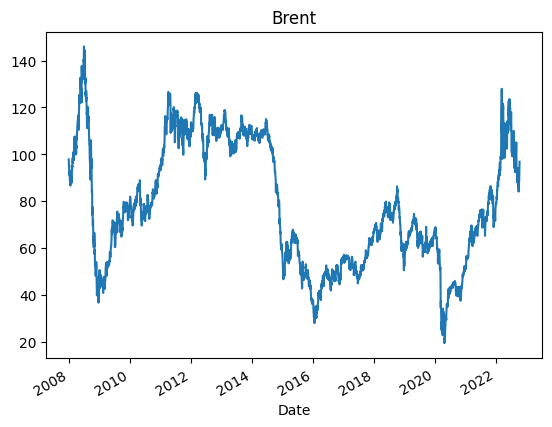

In [10]:
# нефть
bzf = pdr.get_data_yahoo('BZ=F', start=start)

print(bzf.tail())
print('-----')
print(len(bzf['Close']))

bzf['Close'].plot(title='Brent')

In [11]:
# беру только цену закрытия
brent = bzf['Close'].to_frame(name='Brent')

brent

,Brent
Date,
2008-01-02,97.84
2008-01-03,97.60
2008-01-04,96.79
2008-01-07,94.39
2008-01-08,95.54
...,...
2022-10-03,88.86
2022-10-04,91.80
2022-10-05,93.37


                  High         Low        Open       Close    Volume  \
Date                                                                   
2022-10-03  1700.00000  1661.90002  1667.19995  1692.90002     410.0   
2022-10-04  1728.00000  1696.00000  1701.19995  1721.09998     291.0   
2022-10-05  1726.59998  1703.00000  1724.09998  1711.40002     418.0   
2022-10-06  1723.30005  1709.09998  1721.00000  1711.69995     418.0   
2022-10-07  1722.80005  1698.40002  1721.00000  1704.40002  112080.0   

             Adj Close  
Date                    
2022-10-03  1692.90002  
2022-10-04  1721.09998  
2022-10-05  1711.40002  
2022-10-06  1711.69995  
2022-10-07  1704.40002  
-----
3717


<AxesSubplot: title={'center': 'Gold'}, xlabel='Date'>

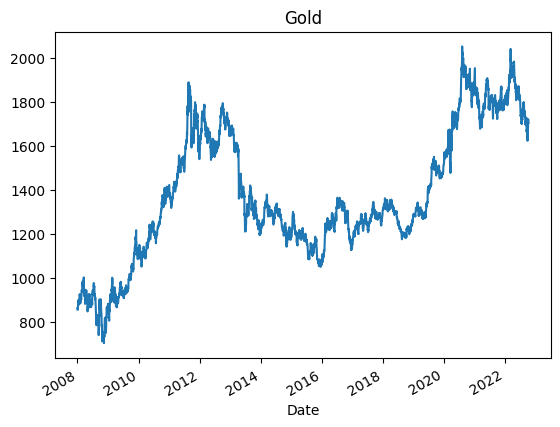

In [14]:
# золото
gcf = pdr.get_data_yahoo('GC=F', start=start)

print(gcf.tail())
print('-----')
print(len(gcf['Close']))

gcf['Close'].plot(title='Gold')

In [15]:
# беру только цену закрытия
gold = gcf['Close'].to_frame(name='Gold')


gold


,Gold
Date,
2008-01-02,857.00000
2008-01-03,866.40002
2008-01-04,863.09998
2008-01-07,859.59998
2008-01-08,878.00000
...,...
2022-10-03,1692.90002
2022-10-04,1721.09998
2022-10-05,1711.40002


              High     Low    Open   Close   Volume  Adj Close
Date                                                          
2022-10-03  20.705  20.170  20.170  20.519     49.0     20.519
2022-10-04  21.115  20.820  20.820  21.037    142.0     21.037
2022-10-05  20.795  20.130  20.795  20.479     41.0     20.479
2022-10-06  20.660  20.420  20.610  20.595     41.0     20.595
2022-10-07  20.875  20.135  20.710  20.220  38614.0     20.220
-----
3716


<AxesSubplot: title={'center': 'Silver'}, xlabel='Date'>

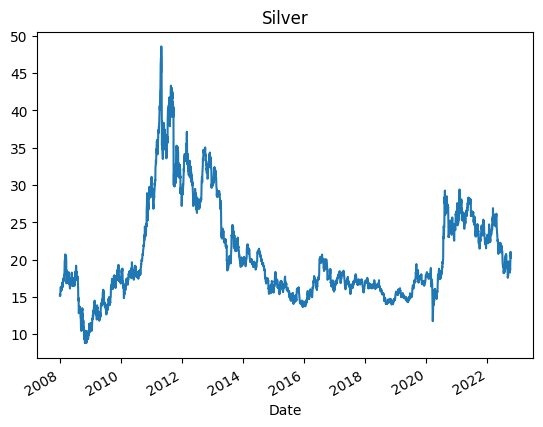

In [16]:
# серебро
sif = pdr.get_data_yahoo('SI=F', start=start)

print(sif.tail())
print('-----')
print(len(sif['Close']))

sif['Close'].plot(title='Silver')

In [17]:
# беру только цену закрытия
silver = sif['Close'].to_frame(name='Silver')

silver

,Silver
Date,
2008-01-02,15.167
2008-01-03,15.382
2008-01-04,15.346
2008-01-07,15.180
2008-01-08,15.707
...,...
2022-10-03,20.519
2022-10-04,21.037
2022-10-05,20.479


              High     Low    Open   Close  Volume  Adj Close
Date                                                         
2022-09-30  328.50  328.50  328.50  328.50     5.0     328.50
2022-10-03  314.00  314.00  314.00  314.00     0.0     314.00
2022-10-04  300.00  300.00  300.00  300.00     0.0     300.00
2022-10-05  293.75  293.75  293.75  293.75     0.0     293.75
2022-10-06  265.50  265.50  265.50  265.50     0.0     265.50
-----
2860


<AxesSubplot: title={'center': 'Coal'}, xlabel='Date'>

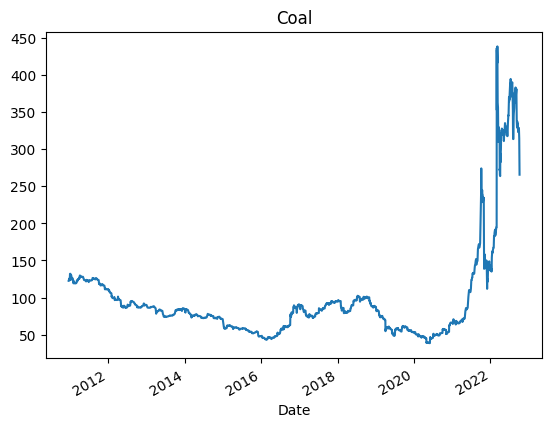

In [18]:
# уголь
mtff = pdr.get_data_yahoo('MTF=F', start=start)

print(mtff.tail())
print('-----')
print(len(mtff['Close']))

mtff['Close'].plot(title='Coal')

In [19]:
# беру только цену закрытия
coal = mtff['Close'].to_frame(name='Coal')

coal

,Coal
Date,
2010-12-17,122.50
2010-12-20,122.50
2010-12-21,123.25
2010-12-22,125.50
2010-12-23,125.25
...,...
2022-09-30,328.50
2022-10-03,314.00
2022-10-04,300.00


             High      Low   Open    Close  Volume  Adj Close
Date                                                         
2022-10-03  33.74  32.4750  33.39  33.6660   18100    33.6660
2022-10-04  35.43  33.8500  33.95  35.1960   32300    35.1960
2022-10-05  36.22  35.3900  36.17  35.9000   18200    35.9000
2022-10-06  36.57  35.4200  36.52  35.6100   23500    35.6100
2022-10-07  35.59  34.5801  35.10  34.6201    8578    34.6201
-----
1382


<AxesSubplot: title={'center': 'GAZ'}, xlabel='Date'>

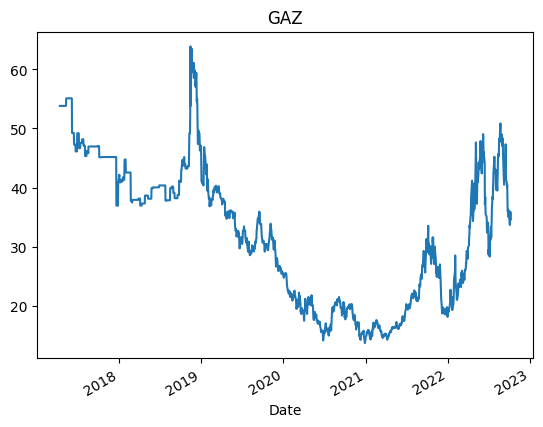

In [20]:
# газ
gaz = pdr.get_data_yahoo('GAZ', start=start)

print(gaz.tail())
print('-----')
print(len(gaz['Close']))

gaz['Close'].plot(title='GAZ')

In [21]:
# беру только цену закрытия
gaz_1 = gaz['Close'].to_frame(name='Gaz')

gaz_1

,Gaz
Date,
2017-04-13,53.8200
2017-04-17,53.8200
2017-04-18,53.8200
2017-04-19,53.8200
2017-04-20,53.8200
...,...
2022-10-03,33.6660
2022-10-04,35.1960
2022-10-05,35.9000


In [22]:
# Ethanol -  не данных
# cuf = pdr.get_data_yahoo('CU=F', start='2020-01-01')

# print(cuf.tail())
# print('-----')
# print(len(cuf['Close']))

# cuf['Close'].plot(title='Ethanol')

                 High        Low       Open      Close   Volume  Adj Close
Date                                                                      
2022-10-03  915.20001  895.00000  895.00000  911.29999     16.0  911.29999
2022-10-04  950.00000  911.29999  911.29999  943.70001     12.0  943.70001
2022-10-05  946.40002  918.90002  946.40002  924.59998    102.0  924.59998
2022-10-06  931.70001  931.70001  931.70001  931.70001    102.0  931.70001
2022-10-07  945.00000  934.00000  924.00000  924.50000  11678.0  924.50000
-----
3417


<AxesSubplot: title={'center': 'Platinum'}, xlabel='Date'>

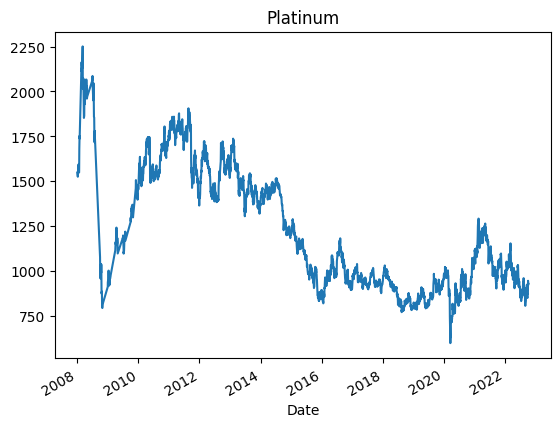

In [23]:
# Platinum
plf = pdr.get_data_yahoo('PL=F', start=start)

print(plf.tail())
print('-----')
print(len(plf['Close']))

plf['Close'].plot(title='Platinum')

In [24]:
# беру только цену закрытия
platinum = plf['Close'].to_frame(name='Platinum')

platinum

,Platinum
Date,
2008-01-02,1547.00000
2008-01-03,1541.80005
2008-01-04,1539.09998
2008-01-07,1524.19995
2008-01-08,1553.59998
...,...
2022-10-03,911.29999
2022-10-04,943.70001
2022-10-05,924.59998


              High     Low    Open   Close    Volume  Adj Close
Date                                                           
2022-10-03  687.50  672.50  680.00  680.75  132393.0     680.75
2022-10-04  691.50  676.50  680.75  683.00  119212.0     683.00
2022-10-05  687.50  675.75  683.00  684.00  114315.0     684.00
2022-10-06  685.75  672.00  683.75  675.50  114315.0     675.50
2022-10-07  682.00  671.50  675.50  681.00   39197.0     681.00
-----
3715


<AxesSubplot: title={'center': 'Corn'}, xlabel='Date'>

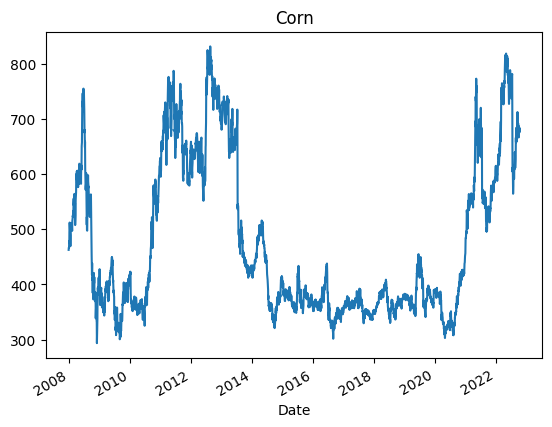

In [25]:
# Corn
zcf = pdr.get_data_yahoo('ZC=F', start=start)

print(zcf.tail())
print('-----')
print(len(zcf['Close']))

zcf['Close'].plot(title='Corn')

In [26]:
# беру только цену закрытия
corn = zcf['Close'].to_frame(name='Corn')

corn

,Corn
Date,
2008-01-02,462.50
2008-01-03,466.00
2008-01-04,466.75
2008-01-07,466.25
2008-01-08,478.75
...,...
2022-10-03,680.75
2022-10-04,683.00
2022-10-05,684.00


             High    Low   Open  Close    Volume  Adj Close
Date                                                       
2022-10-02  33.20  31.90  32.35  32.90  620559.0      32.90
2022-10-03  33.45  33.05  33.30  33.25  362663.0      33.25
2022-10-04  33.25  33.25  33.25  33.25       0.0      33.25
2022-10-05  34.85  33.90  34.60  33.90  750874.0      33.90
2022-10-06  35.00  34.20  34.20  34.75  588891.0      34.75
-----
3082


<AxesSubplot: title={'center': 'Methanol'}, xlabel='Date'>

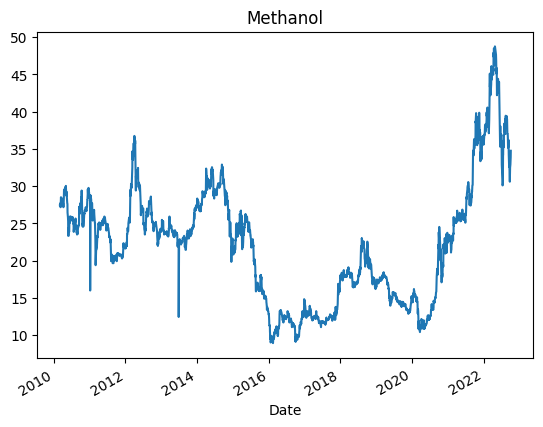

In [27]:
# Methanol 
sr = pdr.get_data_yahoo('2001.SR', start=start)

print(sr.tail())
print('-----')
print(len(sr['Close']))

sr['Close'].plot(title='Methanol')

In [28]:
# беру только цену закрытия
methanol = sr['Close'].to_frame(name='Methanol')

methanol

,Methanol
Date,
2010-03-03,27.44502
2010-03-04,27.44502
2010-03-07,27.53442
2010-03-08,27.71321
2010-03-09,27.44502
...,...
2022-10-02,32.90000
2022-10-03,33.25000
2022-10-04,33.25000


              High     Low    Open   Close   Volume  Adj Close
Date                                                          
2022-10-03  3.4600  3.3940  3.4000  3.4580    609.0     3.4580
2022-10-04  3.5500  3.4640  3.4640  3.5180    720.0     3.5180
2022-10-05  3.5825  3.5035  3.5290  3.5325    282.0     3.5325
2022-10-06  3.5015  3.4750  3.4925  3.4750    282.0     3.4750
2022-10-07  3.4480  3.3805  3.4395  3.3955  34754.0     3.3955
-----
3718


<AxesSubplot: title={'center': 'Copper'}, xlabel='Date'>

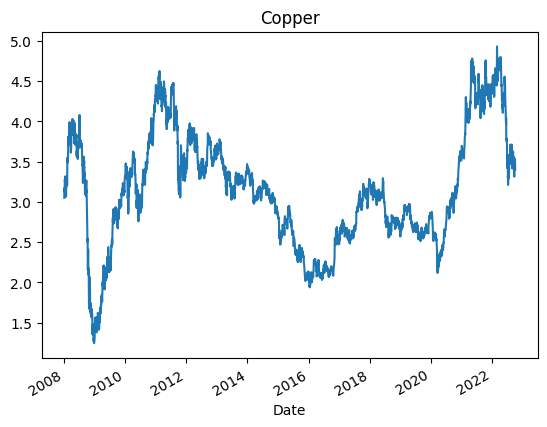

In [29]:
# Copper
hgf = pdr.get_data_yahoo('HG=F', start=start)

print(hgf.tail())
print('-----')
print(len(hgf['Close']))

hgf['Close'].plot(title='Copper')

In [30]:
# беру только цену закрытия
cupper = hgf['Close'].to_frame(name='Cupper')

cupper

,Cupper
Date,
2008-01-02,3.0505
2008-01-03,3.1730
2008-01-04,3.1415
2008-01-07,3.1250
2008-01-08,3.2735
...,...
2022-10-03,3.4580
2022-10-04,3.5180
2022-10-05,3.5325


                   High          Low         Open        Close      Volume  \
Date                                                                         
2022-10-03  10875.45996  10577.88965  10659.00977  10815.42969  4415440000   
2022-10-04  11189.95996  11044.04004  11054.71973  11176.41016  5004780000   
2022-10-05  11210.32031  10910.75977  11022.66992  11148.63965  4091860000   
2022-10-06  11230.44043  11051.26953  11129.04004  11073.30957  4423320000   
2022-10-07  10891.92676  10752.57129  10877.29980  10792.46680  1192401000   

              Adj Close  
Date                     
2022-10-03  10815.42969  
2022-10-04  11176.41016  
2022-10-05  11148.63965  
2022-10-06  11073.30957  
2022-10-07  10792.46680  
-----
3719


<AxesSubplot: title={'center': 'NASDAQ'}, xlabel='Date'>

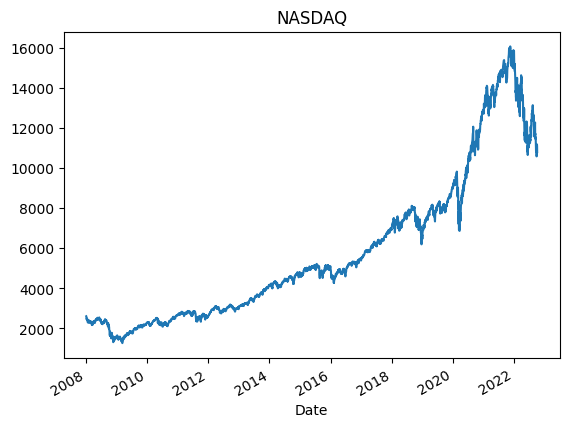

In [31]:
# NASDAQ Composite (^IXIC)
nasdaq = pdr.get_data_yahoo('^IXIC', start=start)

print(nasdaq.tail())
print('-----')
print(len(nasdaq['Close']))

nasdaq['Close'].plot(title='NASDAQ')

In [32]:
# беру только цену закрытия
nasdaq_1 = nasdaq['Close'].to_frame(name='NASDAQ')

nasdaq_1

,NASDAQ
Date,
2008-01-02,2609.62988
2008-01-03,2602.67993
2008-01-04,2504.64990
2008-01-07,2499.45996
2008-01-08,2440.51001
...,...
2022-10-03,10815.42969
2022-10-04,11176.41016
2022-10-05,11148.63965


                  High         Low        Open       Close      Volume  \
Date                                                                     
2022-10-03  3698.35010  3604.92993  3609.78003  3678.42993  4806680000   
2022-10-04  3791.91992  3726.45996  3726.45996  3790.92993  5146580000   
2022-10-05  3806.90991  3722.65991  3753.25000  3783.28003  4293180000   
2022-10-06  3797.92993  3739.21997  3771.96997  3744.52002  4252100000   
2022-10-07  3706.73999  3659.40991  3706.73999  3672.95996   648898157   

             Adj Close  
Date                    
2022-10-03  3678.42993  
2022-10-04  3790.92993  
2022-10-05  3783.28003  
2022-10-06  3744.52002  
2022-10-07  3672.95996  
-----
3719


<AxesSubplot: title={'center': 'S&P 500 (^GSPC)'}, xlabel='Date'>

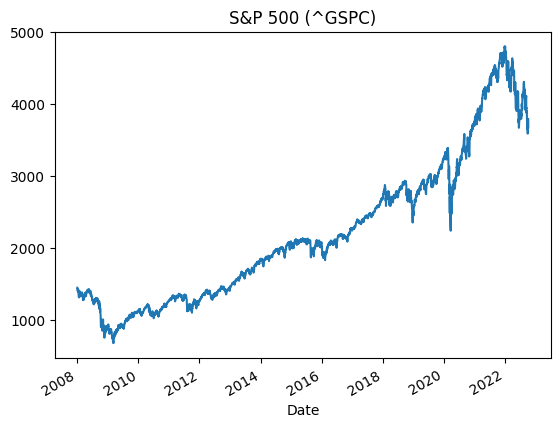

In [33]:
# S&P 500 (^GSPC)
sp500 = pdr.get_data_yahoo('^GSPC', start=start)

print(sp500.tail())
print('-----')
print(len(sp500['Close']))

sp500['Close'].plot(title='S&P 500 (^GSPC)')

In [34]:
# беру только цену закрытия
sp500_1 = sp500['Close'].to_frame(name='SP500')

sp500_1

,SP500
Date,
2008-01-02,1447.16003
2008-01-03,1447.16003
2008-01-04,1411.63000
2008-01-07,1416.18005
2008-01-08,1390.18994
...,...
2022-10-03,3678.42993
2022-10-04,3790.92993
2022-10-05,3783.28003


In [35]:
# изменения показателя
sp500_2 = sp500_1.diff()

sp500_2

,SP500
Date,
2008-01-02,NaN
2008-01-03,0.00000
2008-01-04,-35.53003
2008-01-07,4.55005
2008-01-08,-25.99011
...,...
2022-10-03,92.80981
2022-10-04,112.50000
2022-10-05,-7.64990


<AxesSubplot: xlabel='Date'>

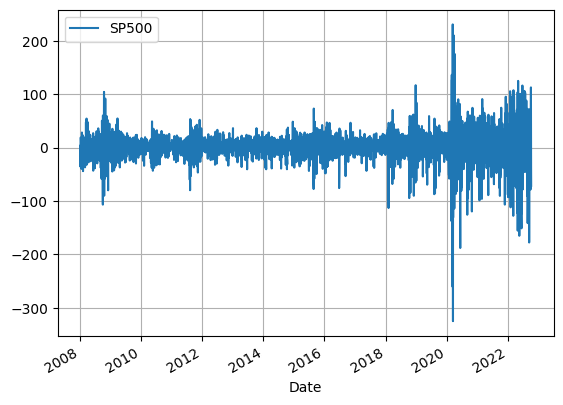

In [36]:
# график изменения показателя
sp500_2.plot(grid=True)

array([[<AxesSubplot: title={'center': 'SP500'}>]], dtype=object)

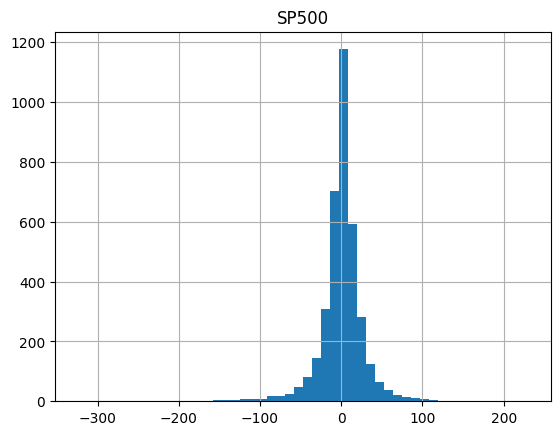

In [37]:
# sp500_2.hist()

sp500_2.hist(bins=50)

In [38]:
# соед все в один df

df = pd.concat([gold, brent, silver, coal, gaz_1, platinum, cupper, corn, methanol, nasdaq_1, sp500_1], axis=1)

df

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2008-01-02,857.00000,97.84,15.167,NaN,NaN,1547.00000,3.0505,462.50,NaN,2609.62988,1447.16003
2008-01-03,866.40002,97.60,15.382,NaN,NaN,1541.80005,3.1730,466.00,NaN,2602.67993,1447.16003
2008-01-04,863.09998,96.79,15.346,NaN,NaN,1539.09998,3.1415,466.75,NaN,2504.64990,1411.63000
2008-01-07,859.59998,94.39,15.180,NaN,NaN,1524.19995,3.1250,466.25,NaN,2499.45996,1416.18005
2008-01-08,878.00000,95.54,15.707,NaN,NaN,1553.59998,3.2735,478.75,NaN,2440.51001,1390.18994
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-03,1692.90002,88.86,20.519,314.00,33.6660,911.29999,3.4580,680.75,33.25,10815.42969,3678.42993
2022-10-04,1721.09998,91.80,21.037,300.00,35.1960,943.70001,3.5180,683.00,33.25,11176.41016,3790.92993
2022-10-05,1711.40002,93.37,20.479,293.75,35.9000,924.59998,3.5325,684.00,33.90,11148.63965,3783.28003


In [40]:
df.isna().count()

Gold        4442
Brent       4442
Silver      4442
Coal        4442
Gaz         4442
Platinum    4442
Cupper      4442
Corn        4442
Methanol    4442
NASDAQ      4442
SP500       4442
dtype: int64

In [42]:
# df.to_excel('commodity_2.xlsx')

In [43]:
df.describe()

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
count,3717.00000,3661.00000,3716.00000,2860.00000,1382.00000,3417.00000,3718.00000,3715.00000,3082.00000,3719.00000,3719.00000
mean,1373.51022,78.07380,20.53371,97.11287,32.06008,1209.82429,3.13951,475.82201,21.99139,5805.60968,2199.84832
std,293.90778,26.27371,6.55151,65.69886,11.74022,332.44572,0.70908,141.56552,7.97124,3758.08634,1013.78161
min,704.90002,19.33000,8.79000,38.58000,13.67100,595.90002,1.24750,293.50000,8.93975,1268.64001,676.53003
25%,1198.69995,56.01000,16.20900,60.15000,20.37000,932.09998,2.65713,364.00000,15.00089,2745.89490,1332.84998
50%,1306.90002,73.59000,18.02100,82.00000,32.31350,1085.59998,3.10000,400.75000,22.43876,4766.47021,2039.81995
75%,1634.69995,105.46000,24.03975,97.65000,40.98975,1493.80005,3.58438,593.37500,26.62256,7729.14502,2809.73499
max,2051.50000,146.08000,48.58400,438.35001,63.89000,2251.10010,4.92900,831.25000,48.75000,16057.44043,4796.56006


In [44]:
df.corr()

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Gold,1.00000,0.14748,0.67325,0.43532,-0.74082,-0.04733,0.56715,0.49440,0.41159,0.65152,0.61774
Brent,0.14748,1.00000,0.57258,0.44785,0.23157,0.72586,0.67564,0.74344,0.69662,-0.26761,-0.25773
Silver,0.67325,0.57258,1.00000,0.21765,-0.63870,0.62061,0.70598,0.74975,0.39799,0.01763,-0.02612
Coal,0.43532,0.44785,0.21765,1.00000,0.19782,0.00799,0.56391,0.55317,0.69610,0.37841,0.40198
Gaz,-0.74082,0.23157,-0.63870,0.19782,1.00000,-0.37247,-0.32575,-0.21553,-0.15179,-0.64911,-0.54847
Platinum,-0.04733,0.72586,0.62061,0.00799,-0.37247,1.00000,0.51060,0.53328,0.39972,-0.61960,-0.66007
Cupper,0.56715,0.67564,0.70598,0.56391,-0.32575,0.51060,1.00000,0.75005,0.76295,0.30840,0.28094
Corn,0.49440,0.74344,0.74975,0.55317,-0.21553,0.53328,0.75005,1.00000,0.63008,0.04313,0.02371
Methanol,0.41159,0.69662,0.39799,0.69610,-0.15179,0.39972,0.76295,0.63008,1.00000,0.22124,0.20013
NASDAQ,0.65152,-0.26761,0.01763,0.37841,-0.64911,-0.61960,0.30840,0.04313,0.22124,1.00000,0.99005


<AxesSubplot: >

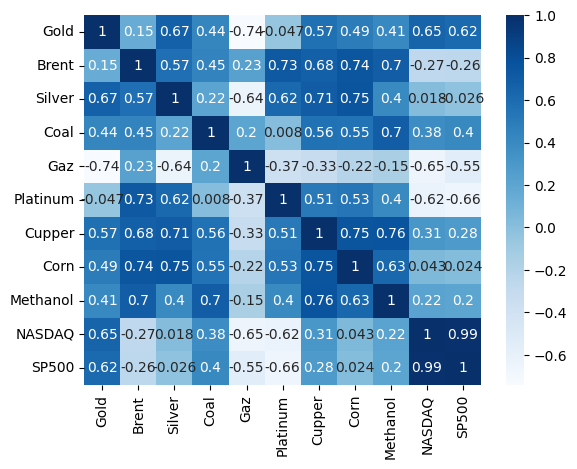

In [45]:
# 2022-10-07 
# seaborn corr

corr = df.corr()

sns.heatmap(corr, cmap='Blues', annot=True)

# sns.heatmap(corr, annot=True)


# mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(230, 20, as_cmap=True)
# sns.heatmap(corr, annot=True) # , cmap=cmap


In [46]:
# очистил от nan

df1 = df.dropna(how='any')

df1

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-13,1285.90002,55.89,18.489,75.55,53.820,973.70001,2.5695,371.00,12.60504,5805.14990,2328.94995
2017-04-17,1289.40002,55.36,18.493,75.55,53.820,987.50000,2.5950,366.50,12.51564,5856.79004,2349.01001
2017-04-18,1291.69995,54.89,18.251,75.55,53.820,975.79999,2.5290,361.75,12.24745,5849.47021,2342.18994
2017-04-19,1281.40002,52.93,18.136,75.30,53.820,967.50000,2.5335,361.75,12.33685,5863.02979,2338.16992
2017-04-20,1281.90002,52.99,17.992,75.60,53.820,978.00000,2.5410,357.75,12.24745,5916.77979,2355.84009
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,1658.50000,88.49,18.611,328.25,35.449,871.29999,3.4400,669.50,32.50000,10737.50977,3640.46997
2022-10-03,1692.90002,88.86,20.519,314.00,33.666,911.29999,3.4580,680.75,33.25000,10815.42969,3678.42993
2022-10-04,1721.09998,91.80,21.037,300.00,35.196,943.70001,3.5180,683.00,33.25000,11176.41016,3790.92993


In [47]:
df1.describe()

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
count,1053.00000,1053.00000,1053.00000,1053.00000,1053.00000,1053.00000,1053.00000,1053.00000,1053.00000,1053.00000,1053.00000
mean,1550.91804,66.97432,19.30090,112.43258,32.27314,932.10589,3.25283,451.48504,21.46929,9839.29395,3296.66690
std,258.02902,19.13487,4.20015,88.05673,11.68047,106.95677,0.70483,133.51888,9.64754,2999.93817,710.06864
min,1176.19995,19.33000,11.73500,38.58000,13.67100,595.90002,2.11950,302.75000,10.42374,5805.14990,2237.39990
25%,1289.40002,55.80000,16.13600,58.20000,20.68600,856.50000,2.70200,359.50000,14.24996,7396.58984,2730.12988
50%,1515.90002,65.40000,17.49300,82.60000,32.86700,924.59998,3.01200,380.75000,17.86161,8433.20020,2997.95996
75%,1796.69995,75.17000,23.43500,101.20000,40.99000,982.20001,3.71050,550.25000,25.74647,12639.26953,3925.42993
max,2051.50000,127.98000,29.39800,438.35001,63.89000,1280.00000,4.79600,816.00000,48.75000,15993.70996,4796.56006


In [48]:
df1.corr()

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Gold,1.00000,0.16711,0.86172,0.37516,-0.73926,0.46955,0.64670,0.64202,0.60552,0.86526,0.82423
Brent,0.16711,1.00000,0.20207,0.82530,0.22329,0.22628,0.62921,0.74088,0.80937,0.38651,0.52763
Silver,0.86172,0.20207,1.00000,0.27321,-0.62791,0.76421,0.78061,0.64290,0.57868,0.85957,0.80600
Coal,0.37516,0.82530,0.27321,1.00000,0.19362,0.12173,0.58861,0.77968,0.83261,0.44256,0.55663
Gaz,-0.73926,0.22329,-0.62791,0.19362,1.00000,-0.36848,-0.32235,-0.22138,-0.15020,-0.64608,-0.54775
Platinum,0.46955,0.22628,0.76421,0.12173,-0.36848,1.00000,0.70039,0.51083,0.37477,0.58544,0.56466
Cupper,0.64670,0.62921,0.78061,0.58861,-0.32235,0.70039,1.00000,0.85746,0.85863,0.85219,0.88451
Corn,0.64202,0.74088,0.64290,0.77968,-0.22138,0.51083,0.85746,1.00000,0.89734,0.75370,0.82693
Methanol,0.60552,0.80937,0.57868,0.83261,-0.15020,0.37477,0.85863,0.89734,1.00000,0.77361,0.85175
NASDAQ,0.86526,0.38651,0.85957,0.44256,-0.64608,0.58544,0.85219,0.75370,0.77361,1.00000,0.98075


<AxesSubplot: >

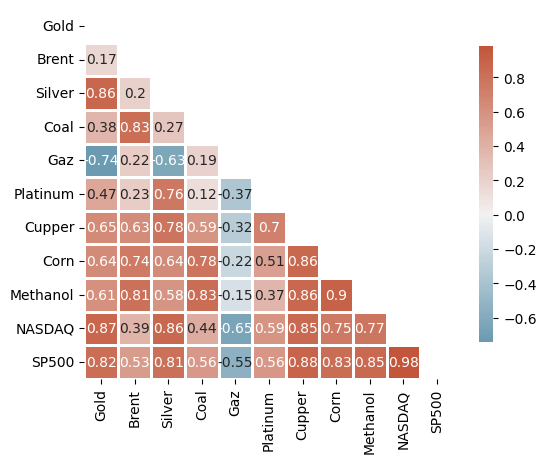

In [49]:
corr1 = df1.corr()

# sns.heatmap(corr1, cmap='Blues', annot=True)



mask = np.triu(np.ones_like(corr1, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr1, cmap=cmap, mask=mask, annot=True, center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}) # , cmap=cmap

In [50]:
# ежедневные изменения стоимости
df2 = df1.diff()

df2

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-04-17,3.50000,-0.53,0.004,0.00,0.000,13.79999,0.0255,-4.50,-0.08940,51.64014,20.06006
2017-04-18,2.29993,-0.47,-0.242,0.00,0.000,-11.70001,-0.0660,-4.75,-0.26819,-7.31982,-6.82007
2017-04-19,-10.29993,-1.96,-0.115,-0.25,0.000,-8.29999,0.0045,0.00,0.08940,13.55957,-4.02002
2017-04-20,0.50000,0.06,-0.144,0.30,0.000,10.50000,0.0075,-4.00,-0.08940,53.75000,17.67017
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,-1.90002,-0.83,-0.185,0.75,-0.631,0.20001,0.0580,-1.00,0.00000,-314.12988,-78.57007
2022-10-03,34.40002,0.37,1.908,-14.25,-1.783,40.00000,0.0180,11.25,0.75000,77.91992,37.95996
2022-10-04,28.19995,2.94,0.518,-14.00,1.530,32.40002,0.0600,2.25,0.00000,360.98047,112.50000


In [51]:
df2.describe()

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
count,1052.00000,1052.00000,1052.00000,1052.00000,1052.00000,1052.00000,1052.00000,1052.00000,1052.00000,1052.00000,1052.00000
mean,0.40475,0.03663,0.00200,0.18056,-0.01731,-0.03992,0.00086,0.28945,0.02105,5.00776,1.34560
std,17.57096,2.00816,0.46763,9.92286,1.27838,19.18874,0.05543,10.52684,0.56614,176.70618,46.47360
min,-103.40002,-16.84000,-3.21200,-95.80000,-10.06000,-124.20001,-0.28950,-118.75000,-3.65000,-1248.28027,-296.26001
25%,-6.62497,-0.70000,-0.17625,-0.30000,-0.31875,-9.50000,-0.02500,-3.25000,-0.17879,-50.04285,-13.11487
50%,0.80005,0.14000,0.00300,0.00000,0.00000,0.75003,0.00200,0.25000,0.00000,12.00513,3.17493
75%,8.02499,0.88000,0.16725,0.50000,0.30425,9.62503,0.02850,4.25000,0.19667,80.30225,21.51752
max,93.19995,12.75000,4.02200,241.50000,11.03000,94.29999,0.29500,64.25000,2.60000,887.09961,209.93018


<AxesSubplot: xlabel='Date'>

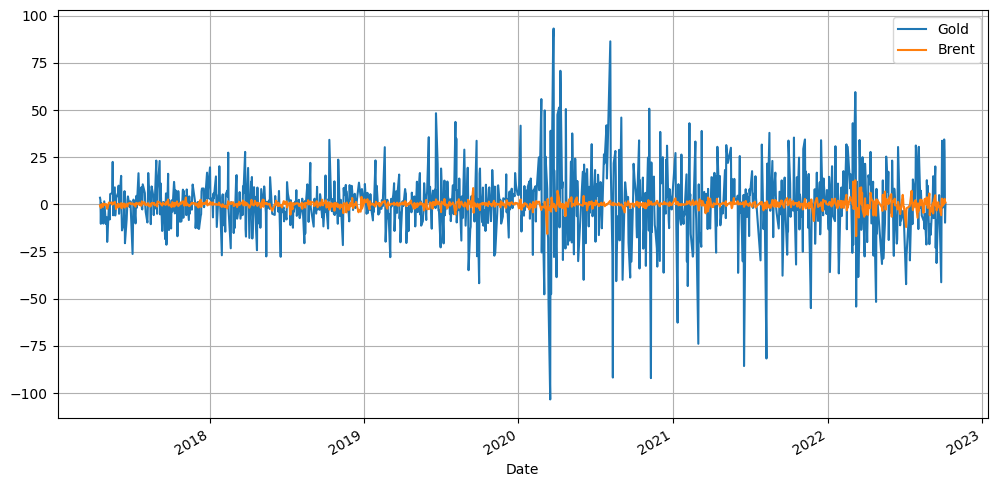

In [52]:
# df2.plot(grid=True)
df2[['Gold', 'Brent']].plot(figsize=(12, 6), grid=True)

In [53]:
df2.corr()

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Gold,1.00000,0.16518,0.76773,-0.02028,0.01143,0.58775,0.24761,0.11221,0.09724,0.07689,0.07105
Brent,0.16518,1.00000,0.18054,0.26578,0.07197,0.23370,0.31898,0.15787,0.24039,0.11723,0.18884
Silver,0.76773,0.18054,1.00000,-0.01837,0.02667,0.64286,0.33816,0.15156,0.12365,0.17727,0.18128
Coal,-0.02028,0.26578,-0.01837,1.00000,0.08631,-0.01909,0.01188,0.00791,0.02886,-0.02633,-0.00090
Gaz,0.01143,0.07197,0.02667,0.08631,1.00000,0.00546,0.05845,-0.00899,0.08617,0.01334,0.03360
Platinum,0.58775,0.23370,0.64286,-0.01909,0.00546,1.00000,0.42187,0.11643,0.18498,0.18933,0.23628
Cupper,0.24761,0.31898,0.33816,0.01188,0.05845,0.42187,1.00000,0.15462,0.19441,0.25361,0.30755
Corn,0.11221,0.15787,0.15156,0.00791,-0.00899,0.11643,0.15462,1.00000,0.01181,0.00627,0.03749
Methanol,0.09724,0.24039,0.12365,0.02886,0.08617,0.18498,0.19441,0.01181,1.00000,0.15612,0.20996
NASDAQ,0.07689,0.11723,0.17727,-0.02633,0.01334,0.18933,0.25361,0.00627,0.15612,1.00000,0.93417


<AxesSubplot: >

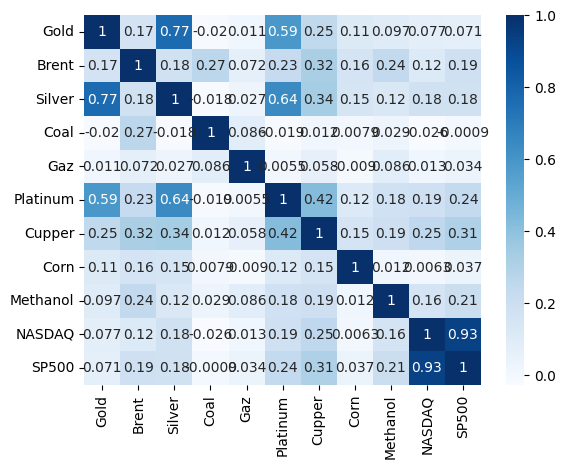

In [54]:
corr2 = df2.corr()

sns.heatmap(corr2, cmap='Blues', annot=True)

In [55]:
# делаю прореживание данных среднюю за месяц

df3 = df.resample('M').mean()


df3

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2008-01-31,891.35713,92.11238,16.05210,NaN,NaN,1587.18947,3.20171,488.57143,NaN,2418.09380,1378.76381
2008-02-29,925.11000,94.65250,17.65610,NaN,NaN,2135.56668,3.58955,516.07500,NaN,2325.82554,1354.87251
2008-03-31,962.93000,102.79900,19.15790,NaN,NaN,2030.57501,3.81107,547.68750,NaN,2254.81804,1316.94299
2008-04-30,909.66364,110.44182,17.47827,NaN,NaN,2012.18502,3.93939,593.36364,NaN,2368.09955,1370.46909
2008-05-31,888.20476,124.38095,17.01200,NaN,NaN,NaN,3.77421,597.85714,NaN,2483.24097,1403.21762
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,1834.54762,117.50636,21.48924,337.69714,39.30938,952.54286,4.11811,758.40476,39.45909,11418.91908,3898.94668
2022-07-31,1729.80000,104.70500,18.92665,383.89250,36.87750,862.06000,3.39610,663.15000,34.35882,11622.63154,3911.72949
2022-08-31,1762.47826,97.74087,19.59222,355.21087,45.64170,898.92609,3.61500,632.07609,38.34130,12570.26040,4158.56308


In [60]:
df3.describe()

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
count,178.00000,178.00000,178.00000,143.00000,67.00000,172.00000,178.00000,178.00000,152.00000,178.00000,178.00000
mean,1374.79580,78.18013,20.53795,97.17307,32.23779,1215.08943,3.14005,476.67905,22.18823,5825.72071,2205.95705
std,293.42558,26.19837,6.49584,65.70093,11.67919,336.10418,0.70484,140.87469,7.90487,3769.67361,1017.53549
min,754.88948,26.53714,9.78279,39.20750,15.03682,755.66364,1.38798,318.70000,9.64215,1432.23318,757.12681
25%,1200.00617,56.10059,16.26310,59.80960,20.27425,931.27159,2.67611,364.55476,15.33946,2753.73020,1339.04559
50%,1301.80119,74.48244,17.89774,82.36667,33.68970,1095.86087,3.09805,397.01136,22.63106,4771.35718,2042.21916
75%,1638.95435,105.73700,24.06584,97.11049,40.92584,1483.23863,3.60864,602.89583,26.80300,7768.37034,2792.68347
max,1966.23808,134.09955,42.58630,383.89250,54.63454,2135.56668,4.68228,803.54348,46.68750,15814.93290,4674.77277


In [61]:
df3.corr()

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Gold,1.00000,0.16239,0.67129,0.44207,-0.75652,-0.08129,0.57195,0.50596,0.42014,0.65667,0.62308
Brent,0.16239,1.00000,0.58421,0.43989,0.22230,0.72477,0.68190,0.75177,0.69156,-0.26363,-0.25270
Silver,0.67129,0.58421,1.00000,0.21738,-0.65288,0.57898,0.71119,0.75954,0.39181,0.01693,-0.02744
Coal,0.44207,0.43989,0.21738,1.00000,0.19608,-0.00179,0.56357,0.56192,0.69328,0.38560,0.40997
Gaz,-0.75652,0.22230,-0.65288,0.19608,1.00000,-0.40525,-0.34362,-0.21956,-0.15531,-0.67000,-0.57094
Platinum,-0.08129,0.72477,0.57898,-0.00179,-0.40525,1.00000,0.49931,0.52724,0.39081,-0.60199,-0.63492
Cupper,0.57195,0.68190,0.71119,0.56357,-0.34362,0.49931,1.00000,0.75894,0.76347,0.31065,0.28267
Corn,0.50596,0.75177,0.75954,0.56192,-0.21956,0.52724,0.75894,1.00000,0.63541,0.05194,0.03278
Methanol,0.42014,0.69156,0.39181,0.69328,-0.15531,0.39081,0.76347,0.63541,1.00000,0.21079,0.18968
NASDAQ,0.65667,-0.26363,0.01693,0.38560,-0.67000,-0.60199,0.31065,0.05194,0.21079,1.00000,0.99020


<AxesSubplot: >

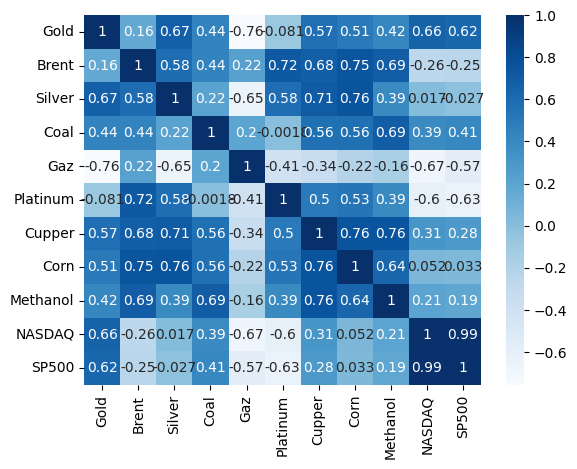

In [62]:
corr3 = df3.corr()

sns.heatmap(corr3, cmap='Blues', annot=True)

In [63]:
# Series с нормализованными данными по столбцам df1
ser1_norm = preprocessing.normalize(df1, axis=0)

ser1_norm

array([[0.02520466, 0.02472797, 0.02884589, ..., 0.0165047 , 0.01739205,
        0.02128299],
       [0.02527326, 0.02449347, 0.02885213, ..., 0.01638765, 0.01754676,
        0.02146631],
       [0.02531834, 0.02428553, 0.02847456, ..., 0.01603648, 0.01752483,
        0.02140398],
       ...,
       [0.03373493, 0.04061598, 0.03282119, ..., 0.04353665, 0.03348417,
        0.03464322],
       [0.0335448 , 0.04131061, 0.03195061, ..., 0.04438775, 0.03340097,
        0.03457331],
       [0.03355068, 0.04177517, 0.03213159, ..., 0.04550071, 0.03317529,
        0.03421911]])

In [64]:
# DataFrame с нормализованными данными. Надо проверить что за функция не пойму как произведена нормализация
df1_norm = pd.DataFrame(ser1_norm, index=df1.index)

df1_norm.columns = ['Gold',	'Brent', 'Silver',	'Coal',	'Gaz',	'Platinum',	'Cupper',	'Corn',	'Methanol',	'NASDAQ','SP500']

df1_norm

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-13,0.02520,0.02473,0.02885,0.01631,0.04833,0.03198,0.02379,0.02428,0.01650,0.01739,0.02128
2017-04-17,0.02527,0.02449,0.02885,0.01631,0.04833,0.03244,0.02403,0.02399,0.01639,0.01755,0.02147
2017-04-18,0.02532,0.02429,0.02847,0.01631,0.04833,0.03205,0.02342,0.02368,0.01604,0.01752,0.02140
2017-04-19,0.02512,0.02342,0.02830,0.01625,0.04833,0.03178,0.02346,0.02368,0.01615,0.01757,0.02137
2017-04-20,0.02513,0.02344,0.02807,0.01632,0.04833,0.03212,0.02353,0.02342,0.01604,0.01773,0.02153
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.03251,0.03915,0.02904,0.07084,0.03183,0.02862,0.03185,0.04382,0.04255,0.03217,0.03327
2022-10-03,0.03318,0.03932,0.03201,0.06777,0.03023,0.02993,0.03202,0.04456,0.04354,0.03240,0.03362
2022-10-04,0.03373,0.04062,0.03282,0.06475,0.03160,0.03100,0.03257,0.04471,0.04354,0.03348,0.03464


In [65]:
df1_norm['Gold'].sum()

32.01038352100626

<AxesSubplot: title={'center': 'preprocessing.normalize'}, xlabel='Date'>

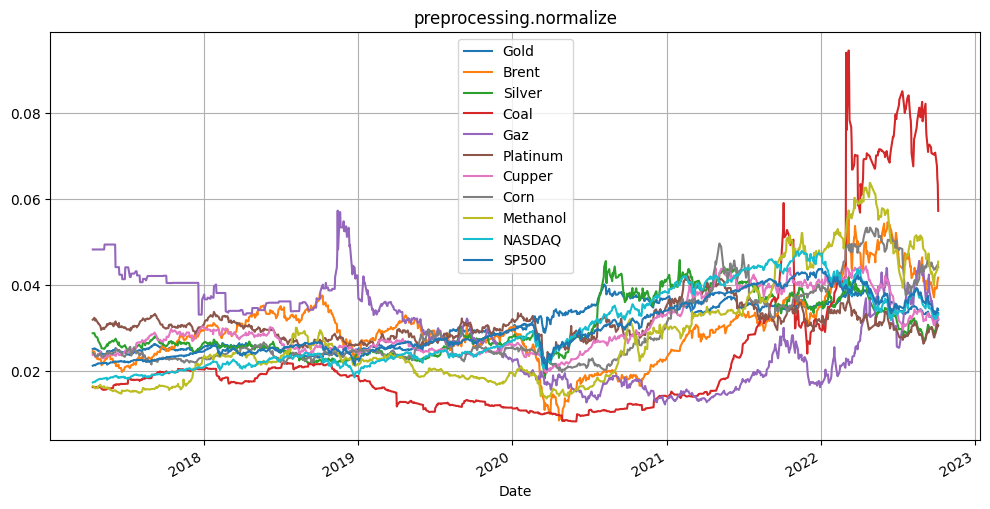

In [66]:
df1_norm.plot(figsize=(12, 6), grid=True, title='preprocessing.normalize')

In [67]:
df1['Gold']

Date
2017-04-13    1285.90002
2017-04-17    1289.40002
2017-04-18    1291.69995
2017-04-19    1281.40002
2017-04-20    1281.90002
                 ...    
2022-09-29    1658.50000
2022-10-03    1692.90002
2022-10-04    1721.09998
2022-10-05    1711.40002
2022-10-06    1711.69995
Name: Gold, Length: 1053, dtype: float64

In [68]:
df1['Gold'].mean()

1550.9180420153727

In [69]:
df1['Gold'].std()

258.0290199594843

In [73]:
# Series с нормализованными данными по столбцам df3 (средн месячные знач)

# надо убрать nan без этого не получиться нормализовать
df3 = df3.dropna(how='any')

ser3_norm = preprocessing.normalize(df3, axis=0)

ser3_norm

# DataFrame с нормализованными данными. Надо проверить что за функция не пойму как произведена нормализация
df3_norm = pd.DataFrame(ser3_norm, index=df3.index)

df3_norm.columns = ['Gold',	'Brent', 'Silver',	'Coal',	'Gaz',	'Platinum',	'Cupper',	'Corn',	'Methanol',	'NASDAQ','SP500']

df3_norm

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-30,0.09822,0.09410,0.11067,0.06350,0.19193,0.12481,0.09471,0.09317,0.06429,0.07003,0.08529
2017-05-31,0.09629,0.08990,0.10272,0.06224,0.19483,0.12061,0.09335,0.09409,0.06320,0.07255,0.08659
2017-06-30,0.09755,0.08315,0.10389,0.06609,0.17431,0.12103,0.09528,0.09555,0.06018,0.07373,0.08799
2017-07-31,0.09568,0.08577,0.09912,0.07016,0.17003,0.11926,0.09993,0.09691,0.06048,0.07456,0.08871
2017-08-31,0.09939,0.09079,0.10407,0.07134,0.16546,0.12675,0.10835,0.09063,0.06177,0.07476,0.08879
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.14203,0.20553,0.13218,0.28419,0.14018,0.12369,0.15081,0.19465,0.20375,0.13526,0.14094
2022-07-31,0.13392,0.18314,0.11642,0.32306,0.13151,0.11194,0.12437,0.17020,0.17741,0.13768,0.14141
2022-08-31,0.13645,0.17096,0.12051,0.29892,0.16276,0.11673,0.13238,0.16222,0.19798,0.14890,0.15033


<AxesSubplot: title={'center': 'Средн мес знач preprocessing.normalize'}, xlabel='Date'>

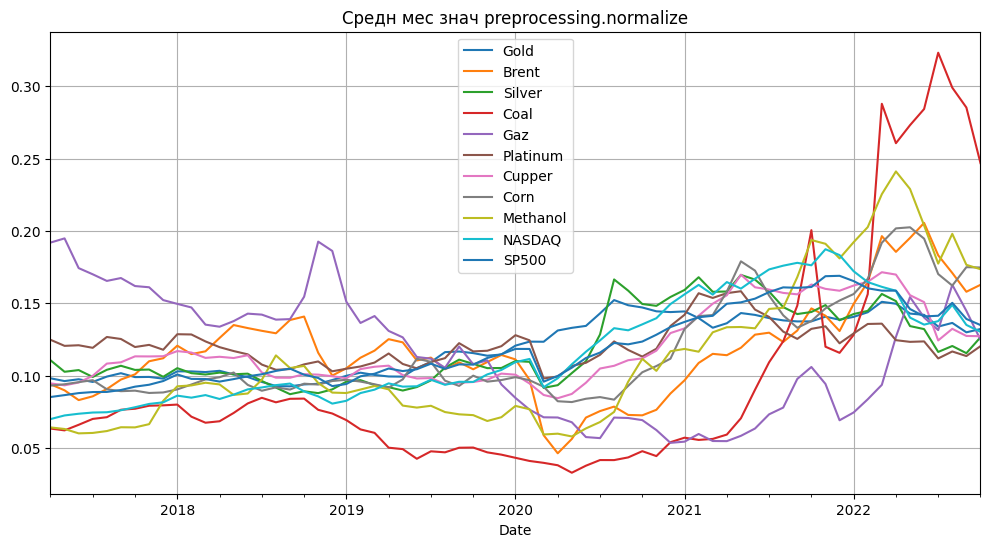

In [74]:
df3_norm.plot(figsize=(12, 6), grid=True, title='Средн мес знач preprocessing.normalize')

In [75]:
# z - нормализация расчетом

df_z = pd.DataFrame()

for column in df1.columns:
    df_z[column] = (df1[column] - df1[column].mean()) / df1[column].std()
    

df_z

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-13,-1.02709,-0.57927,-0.19330,-0.41885,1.84469,0.38889,-0.96950,-0.60280,-0.91881,-1.34474,-1.36285
2017-04-17,-1.01352,-0.60697,-0.19235,-0.41885,1.84469,0.51791,-0.93332,-0.63650,-0.92808,-1.32753,-1.33460
2017-04-18,-1.00461,-0.63153,-0.24997,-0.41885,1.84469,0.40852,-1.02696,-0.67208,-0.95587,-1.32997,-1.34420
2017-04-19,-1.04453,-0.73396,-0.27735,-0.42169,1.84469,0.33092,-1.02057,-0.67208,-0.94661,-1.32545,-1.34987
2017-04-20,-1.04259,-0.73083,-0.31163,-0.41828,1.84469,0.42909,-1.00993,-0.70204,-0.95587,-1.30753,-1.32498
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.41694,1.12442,-0.16426,2.45089,0.27190,-0.56851,0.26555,1.63284,1.14337,0.29941,0.48418
2022-10-03,0.55026,1.14376,0.29001,2.28906,0.11925,-0.19453,0.29109,1.71710,1.22111,0.32539,0.53764
2022-10-04,0.65955,1.29741,0.41334,2.13007,0.25023,0.10840,0.37622,1.73395,1.22111,0.44571,0.69608


In [76]:
# проверка z-оценки из пакета scipy

import scipy.stats as stats

df1_zscore = df1.apply(stats.zscore)

df1_zscore

# верно

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-13,-1.02757,-0.57955,-0.19339,-0.41905,1.84557,0.38907,-0.96996,-0.60309,-0.91925,-1.34538,-1.36350
2017-04-17,-1.01400,-0.60726,-0.19244,-0.41905,1.84557,0.51816,-0.93376,-0.63680,-0.92852,-1.32816,-1.33523
2017-04-18,-1.00509,-0.63183,-0.25009,-0.41905,1.84557,0.40872,-1.02745,-0.67240,-0.95633,-1.33060,-1.34484
2017-04-19,-1.04502,-0.73431,-0.27748,-0.42189,1.84557,0.33108,-1.02106,-0.67240,-0.94706,-1.32608,-1.35051
2017-04-20,-1.04308,-0.73118,-0.31178,-0.41848,1.84557,0.42929,-1.01041,-0.70237,-0.95633,-1.30815,-1.32561
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.41714,1.12496,-0.16433,2.45206,0.27202,-0.56878,0.26568,1.63362,1.14391,0.29955,0.48441
2022-10-03,0.55052,1.14430,0.29015,2.29015,0.11930,-0.19462,0.29123,1.71791,1.22169,0.32554,0.53790
2022-10-04,0.65986,1.29802,0.41354,2.13109,0.25035,0.10845,0.37640,1.73477,1.22169,0.44593,0.69641


<AxesSubplot: title={'center': 'Z-оценка массива временных рядов. Scipy'}, xlabel='Date'>

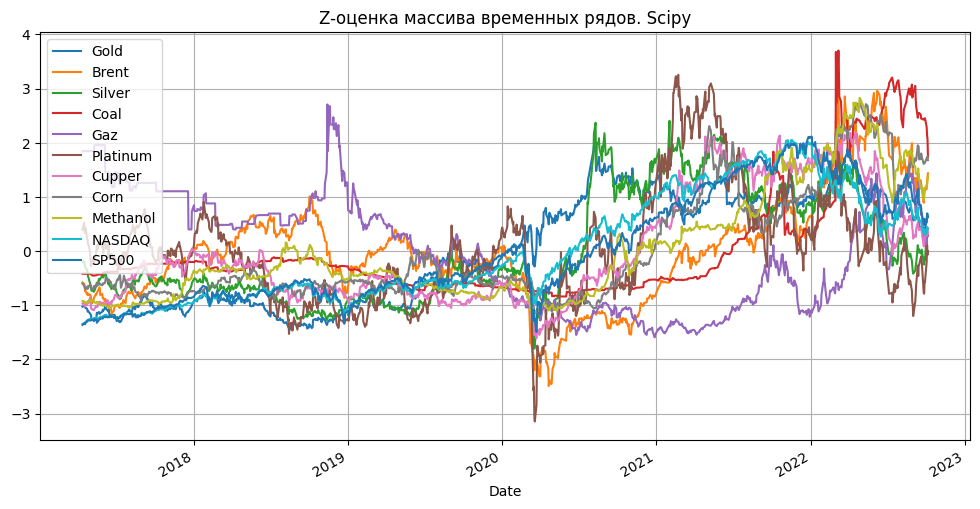

In [77]:
df1_zscore.plot(figsize=(12, 6), grid=True, title='Z-оценка массива временных рядов. Scipy')

In [78]:
df3_zscore = df3.apply(stats.zscore)

df3_zscore

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-30,-1.12320,-0.70557,-0.34444,-0.43704,1.86187,0.25125,-0.96895,-0.68737,-0.95690,-1.33561,-1.34966
2017-05-31,-1.22014,-0.83181,-0.65568,-0.45388,1.93214,-0.06000,-1.02232,-0.66083,-0.97888,-1.26395,-1.29829
2017-06-30,-1.15668,-1.03478,-0.60997,-0.40261,1.43570,-0.02882,-0.94649,-0.61903,-1.03986,-1.23047,-1.24320
2017-07-31,-1.25054,-0.95614,-0.79638,-0.34848,1.33218,-0.16005,-0.76463,-0.57985,-1.03383,-1.20676,-1.21452
2017-08-31,-1.06422,-0.80507,-0.60258,-0.33269,1.22153,0.39443,-0.43505,-0.76029,-1.00766,-1.20112,-1.21150
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,1.08087,2.64571,0.49759,2.50033,0.61006,0.16802,1.22652,2.22706,1.85895,0.51939,0.84532
2022-07-31,0.67289,1.97231,-0.11942,3.01777,0.40026,-0.70244,0.19172,1.52494,1.32722,0.58801,0.86354
2022-08-31,0.80017,1.60597,0.04084,2.69650,1.15634,-0.34778,0.50545,1.29590,1.74242,0.90723,1.21544


<AxesSubplot: title={'center': 'Z-оценка массива временных рядов. Scipy. Средн мес знач'}, xlabel='Date'>

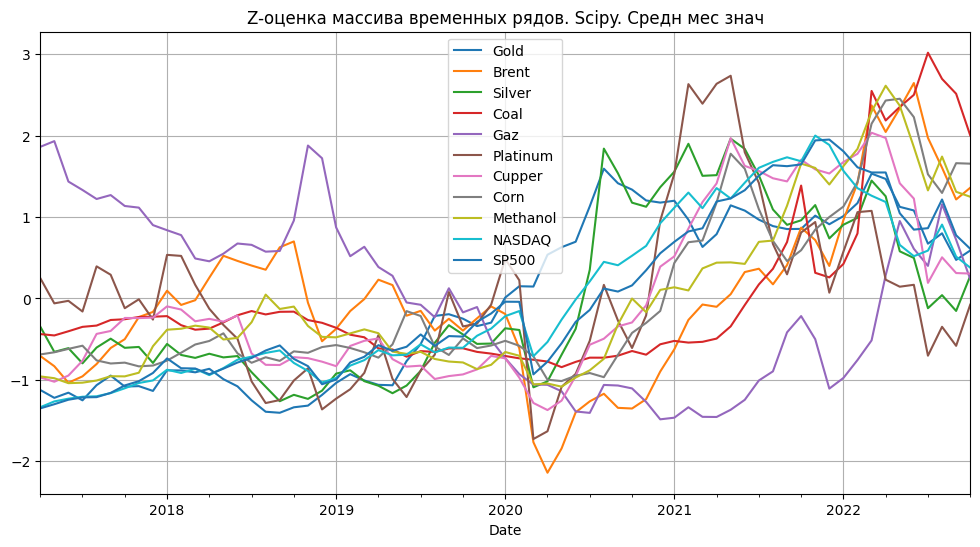

In [79]:
df3_zscore.plot(figsize=(12, 6), grid=True, title='Z-оценка массива временных рядов. Scipy. Средн мес знач')

In [80]:
# Нормализация 

scalerN = preprocessing.Normalizer() # так все в единицы переводит

scalerMMS = preprocessing.MinMaxScaler()

scalerSS = preprocessing.StandardScaler()

In [81]:
ser1_scaler = scalerMMS.fit_transform(df1)

ser1_scaler

array([[0.12532854, 0.33649331, 0.38238126, ..., 0.05691396, 0.        ,
        0.03577347],
       [0.12932716, 0.33161527, 0.38260771, ..., 0.0545814 , 0.00506844,
        0.04361201],
       [0.13195475, 0.32728945, 0.36890672, ..., 0.04758379, 0.00435001,
        0.04094704],
       ...,
       [0.62252941, 0.66700415, 0.52663763, ..., 0.59557751, 0.52718541,
        0.60704682],
       [0.61144755, 0.68145422, 0.49504614, ..., 0.61253721, 0.52445976,
        0.60405759],
       [0.61179021, 0.69111823, 0.50161349, ..., 0.63471517, 0.51706616,
        0.588912  ]])

In [82]:
# DataFrame с нормализованными данными, но вроде бы по всем данным сразу - надо проверить
df1_scaler = pd.DataFrame(ser1_scaler, index=df1.index)

df1_scaler.columns = ['Gold',	'Brent', 'Silver',	'Coal',	'Gaz',	'Platinum',	'Cupper',	'Corn',	'Methanol',	'NASDAQ','SP500']

df1_scaler

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-13,0.12533,0.33649,0.38238,0.09248,0.79948,0.55226,0.16813,0.13298,0.05691,0.00000,0.03577
2017-04-17,0.12933,0.33162,0.38261,0.09248,0.79948,0.57243,0.17766,0.12421,0.05458,0.00507,0.04361
2017-04-18,0.13195,0.32729,0.36891,0.09248,0.79948,0.55533,0.15300,0.11495,0.04758,0.00435,0.04095
2017-04-19,0.12019,0.30925,0.36240,0.09185,0.79948,0.54320,0.15468,0.11495,0.04992,0.00568,0.03938
2017-04-20,0.12076,0.30980,0.35424,0.09260,0.79948,0.55854,0.15748,0.10716,0.04758,0.01096,0.04628
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.55101,0.63654,0.38929,0.72459,0.43366,0.40257,0.49337,0.71456,0.57601,0.48411,0.54825
2022-10-03,0.59031,0.63994,0.49731,0.68895,0.39816,0.46104,0.50009,0.73648,0.59558,0.49176,0.56309
2022-10-04,0.62253,0.66700,0.52664,0.65393,0.42862,0.50841,0.52251,0.74087,0.59558,0.52719,0.60705


<AxesSubplot: title={'center': 'Шкалирование. Ppreprocessing.MinMaxScaler'}, xlabel='Date'>

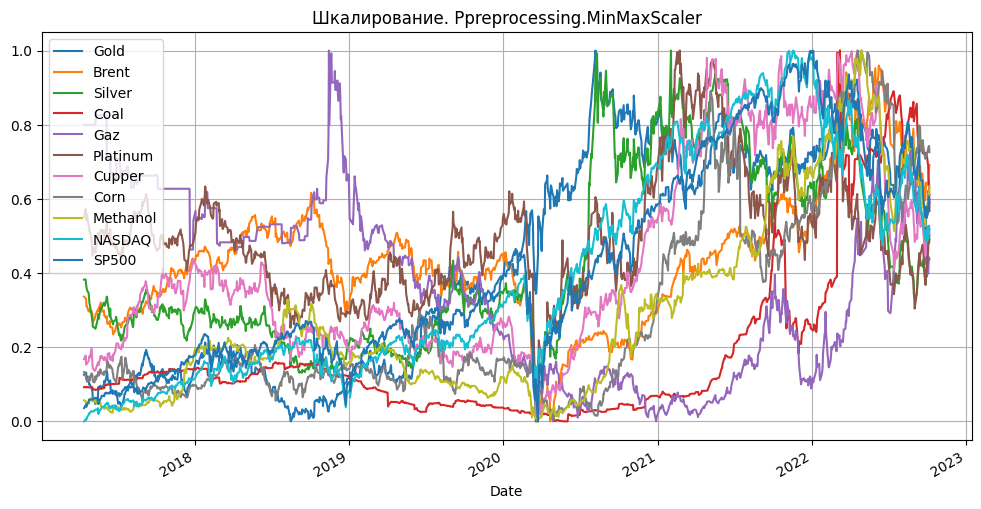

In [83]:
df1_scaler.plot(figsize=(12, 6), grid=True, title='Шкалирование. Ppreprocessing.MinMaxScaler')

In [84]:
ser3_scaler = scalerMMS.fit_transform(df3)

ser3_scaler

# DataFrame с нормализованными данными, но вроде бы по всем данным сразу - надо проверить
df3_scaler = pd.DataFrame(ser3_scaler, index=df3.index)

df3_scaler.columns = ['Gold',	'Brent', 'Silver',	'Coal',	'Gaz',	'Platinum',	'Cupper',	'Corn',	'Methanol',	'NASDAQ','SP500']

df3_scaler

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-30,0.09349,0.29968,0.28444,0.10518,0.97943,0.44324,0.11783,0.09422,0.03414,0.00000,0.00000
2017-05-31,0.06115,0.27329,0.18790,0.10081,1.00000,0.37347,0.10215,0.10188,0.02819,0.02148,0.01556
2017-06-30,0.08233,0.23088,0.20207,0.11409,0.85467,0.38046,0.12442,0.11393,0.01169,0.03152,0.03225
2017-07-31,0.05101,0.24731,0.14426,0.12811,0.82437,0.35104,0.17783,0.12524,0.01333,0.03863,0.04094
2017-08-31,0.11317,0.27888,0.20437,0.13220,0.79198,0.47534,0.27461,0.07318,0.02041,0.04031,0.04185
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.82887,1.00000,0.54562,0.86598,0.61298,0.42459,0.76255,0.93492,0.79608,0.55608,0.66494
2022-07-31,0.69275,0.85928,0.35423,1.00000,0.55156,0.22945,0.45867,0.73239,0.65220,0.57665,0.67046
2022-08-31,0.73522,0.78272,0.40394,0.91679,0.77289,0.30896,0.55080,0.66632,0.76455,0.67235,0.77706


<AxesSubplot: title={'center': 'Шкалирование. Preprocessing.MinMaxScaler. Средн мес знач'}, xlabel='Date'>

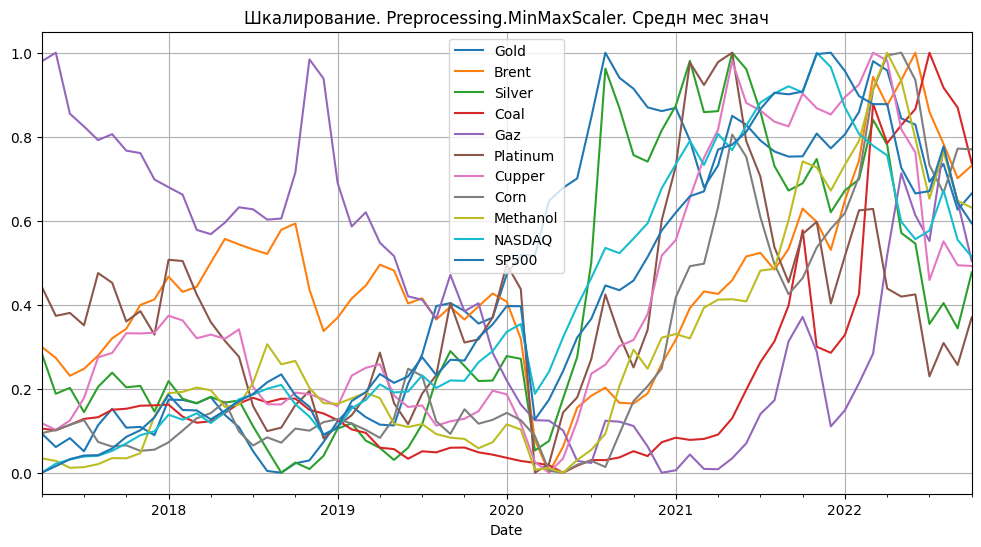

In [85]:
df3_scaler.plot(figsize=(12, 6), grid=True, title='Шкалирование. Preprocessing.MinMaxScaler. Средн мес знач')

In [86]:
# нормализация с использованием sklearn. Но пока не понял корректно ли

from sklearn.preprocessing import normalize

ser_normal2 = normalize(df1, norm='l1', axis=0) # , norm='l1'

df1_norm2 = pd.DataFrame(ser_normal2, index=df1.index)

df1_norm2.columns = ['Gold', 'Brent', 'Silver',	'Coal',	'Gaz', 'Platinum', 'Cupper', 'Corn', 'Methanol', 'NASDAQ', 'SP500']

df1_norm2

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-13,0.00079,0.00079,0.00091,0.00064,0.00158,0.00099,0.00075,0.00078,0.00056,0.00056,0.00067
2017-04-17,0.00079,0.00078,0.00091,0.00064,0.00158,0.00101,0.00076,0.00077,0.00055,0.00057,0.00068
2017-04-18,0.00079,0.00078,0.00090,0.00064,0.00158,0.00099,0.00074,0.00076,0.00054,0.00056,0.00067
2017-04-19,0.00078,0.00075,0.00089,0.00064,0.00158,0.00099,0.00074,0.00076,0.00055,0.00057,0.00067
2017-04-20,0.00078,0.00075,0.00089,0.00064,0.00158,0.00100,0.00074,0.00075,0.00054,0.00057,0.00068
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.00102,0.00125,0.00092,0.00277,0.00104,0.00089,0.00100,0.00141,0.00144,0.00104,0.00105
2022-10-03,0.00104,0.00126,0.00101,0.00265,0.00099,0.00093,0.00101,0.00143,0.00147,0.00104,0.00106
2022-10-04,0.00105,0.00130,0.00104,0.00253,0.00104,0.00096,0.00103,0.00144,0.00147,0.00108,0.00109


<AxesSubplot: title={'center': 'sklearn normalize'}, xlabel='Date'>

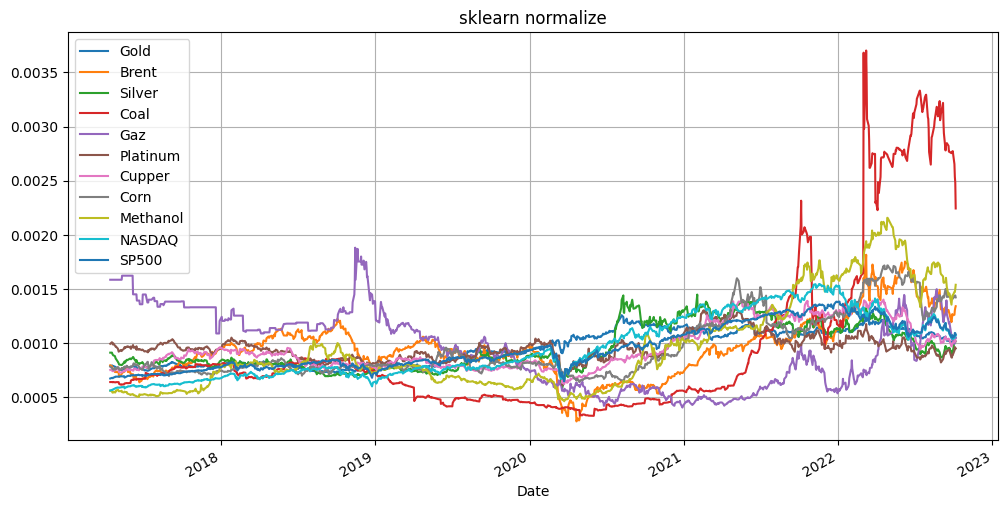

In [87]:
df1_norm2.plot(figsize=(12, 6), grid=True, title='sklearn normalize')

In [88]:
# Мин макс нормализация, но результат тот же самый

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# scaler

scaler.fit(df1)

ser2_scaler = scaler.transform(df1)

df1_scaler2 = pd.DataFrame(ser2_scaler, index=df1.index)

df1_scaler2.columns = ['Gold',	'Brent', 'Silver',	'Coal',	'Gaz',	'Platinum',	'Cupper',	'Corn',	'Methanol',	'NASDAQ','SP500']

df1_scaler2


,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-13,0.12533,0.33649,0.38238,0.09248,0.79948,0.55226,0.16813,0.13298,0.05691,0.00000,0.03577
2017-04-17,0.12933,0.33162,0.38261,0.09248,0.79948,0.57243,0.17766,0.12421,0.05458,0.00507,0.04361
2017-04-18,0.13195,0.32729,0.36891,0.09248,0.79948,0.55533,0.15300,0.11495,0.04758,0.00435,0.04095
2017-04-19,0.12019,0.30925,0.36240,0.09185,0.79948,0.54320,0.15468,0.11495,0.04992,0.00568,0.03938
2017-04-20,0.12076,0.30980,0.35424,0.09260,0.79948,0.55854,0.15748,0.10716,0.04758,0.01096,0.04628
...,...,...,...,...,...,...,...,...,...,...,...
2022-09-29,0.55101,0.63654,0.38929,0.72459,0.43366,0.40257,0.49337,0.71456,0.57601,0.48411,0.54825
2022-10-03,0.59031,0.63994,0.49731,0.68895,0.39816,0.46104,0.50009,0.73648,0.59558,0.49176,0.56309
2022-10-04,0.62253,0.66700,0.52664,0.65393,0.42862,0.50841,0.52251,0.74087,0.59558,0.52719,0.60705


In [89]:
# проверка

ser_g = df['Gold']

ser_g

df_g = pd.DataFrame(ser_g, index=df.index)

df_g


scaler.fit(df_g)

ser = scaler.transform(df_g)

df_g2 = pd.DataFrame(ser, index=df_g.index)

df_g2.columns = ['Gold']

df_g2

# похоже но не совсем совпадает


,Gold
Date,
2008-01-02,0.11295
2008-01-03,0.11993
2008-01-04,0.11748
2008-01-07,0.11488
2008-01-08,0.12855
...,...
2022-10-03,0.73370
2022-10-04,0.75464
2022-10-05,0.74744


In [93]:
# Средн мес знач приведены к унции золота

df4 = pd.DataFrame()

for column in df3.columns:
    df4[column] = df3['Gold'] / df3[column]
    

df4

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-30,1.0,23.58160,70.51184,16.81214,23.57214,1.31987,490.53502,3.49478,101.90167,0.21458,0.53772
2017-05-31,1.0,24.19841,74.47950,16.81743,22.76515,1.33905,487.93744,3.39257,101.62350,0.20307,0.51924
2017-06-30,1.0,26.50524,74.60727,16.04474,25.77862,1.35188,484.27829,3.38467,108.12224,0.20244,0.51769
2017-07-31,1.0,25.20567,76.69601,14.82562,25.92198,1.34572,452.92754,3.27320,105.53046,0.19635,0.50363
2017-08-31,1.0,24.73263,75.87464,15.14337,27.66957,1.31526,433.89319,3.63558,107.31444,0.20341,0.52267
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,1.0,15.61233,85.37053,5.43252,46.66946,1.92595,445.48252,2.41896,46.49239,0.16066,0.47052
2022-07-31,1.0,16.52070,91.39494,4.50595,46.90665,2.00659,509.34896,2.60846,50.34515,0.14883,0.44221
2022-08-31,1.0,18.03215,89.95808,4.96178,38.61553,1.96065,487.54585,2.78840,45.96813,0.14021,0.42382


In [94]:
df4.corr()

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Gold,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Brent,NaN,1.00000,0.31315,0.82576,0.63715,0.59099,0.81637,0.79474,0.72343,0.22186,0.73827
Silver,NaN,0.31315,1.00000,0.27972,-0.14864,0.45115,0.60720,0.32814,0.38305,0.36502,0.37558
Coal,NaN,0.82576,0.27972,1.00000,0.55573,0.32600,0.81885,0.84215,0.81469,0.29893,0.69801
Gaz,NaN,0.63715,-0.14864,0.55573,1.00000,0.56115,0.36327,0.31896,0.16821,-0.48906,0.11409
Platinum,NaN,0.59099,0.45115,0.32600,0.56115,1.00000,0.60779,0.33589,0.11908,-0.24828,0.24924
Cupper,NaN,0.81637,0.60720,0.81885,0.36327,0.60779,1.00000,0.80670,0.77870,0.40761,0.77574
Corn,NaN,0.79474,0.32814,0.84215,0.31896,0.33589,0.80670,1.00000,0.83174,0.44903,0.77778
Methanol,NaN,0.72343,0.38305,0.81469,0.16821,0.11908,0.77870,0.83174,1.00000,0.68437,0.86169
NASDAQ,NaN,0.22186,0.36502,0.29893,-0.48906,-0.24828,0.40761,0.44903,0.68437,1.00000,0.77905


<AxesSubplot: >

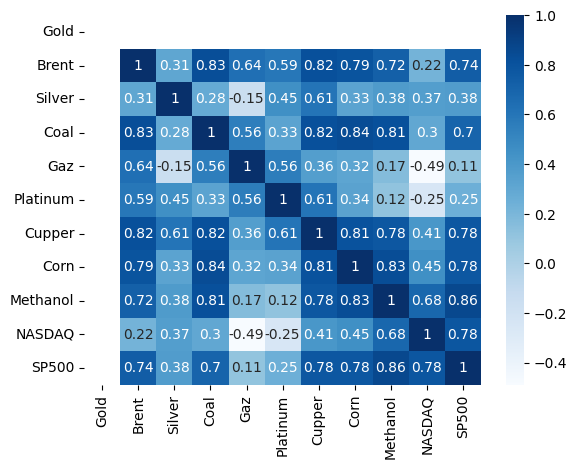

In [95]:
corr4 = df4.corr()

sns.heatmap(corr4, cmap='Blues', annot=True)

In [96]:
# Нормализовываю сренд мес знач в унциях золота

ser4_scaler = scalerMMS.fit_transform(df4)

ser4_scaler

# DataFrame с нормализованными данными, но вроде бы по всем данным сразу - надо проверить
df4_scaler = pd.DataFrame(ser4_scaler, index=df4.index)

df4_scaler.columns = ['Gold',	'Brent', 'Silver',	'Coal',	'Gaz',	'Platinum',	'Cupper',	'Corn',	'Methanol',	'NASDAQ','SP500']

df4_scaler

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-30,0.0,0.17433,0.09693,0.31290,0.00986,0.00513,0.27228,0.31159,0.54245,1.00000,0.67052
2017-05-31,0.0,0.18697,0.18425,0.31303,0.00188,0.02647,0.26455,0.28402,0.53995,0.88440,0.59037
2017-06-30,0.0,0.23424,0.18707,0.29339,0.03169,0.04075,0.25365,0.28189,0.59824,0.87812,0.58365
2017-07-31,0.0,0.20761,0.23304,0.26239,0.03311,0.03389,0.16030,0.25182,0.57500,0.81696,0.52265
2017-08-31,0.0,0.19792,0.21496,0.27047,0.05040,0.00000,0.10363,0.34957,0.59100,0.88783,0.60524
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.0,0.01101,0.42395,0.02356,0.23838,0.67956,0.13813,0.02142,0.04547,0.45867,0.37906
2022-07-31,0.0,0.02963,0.55654,0.00000,0.24073,0.76930,0.32830,0.07253,0.08003,0.33993,0.25625
2022-08-31,0.0,0.06060,0.52491,0.01159,0.15870,0.71818,0.26338,0.12106,0.04077,0.25339,0.17648


<AxesSubplot: title={'center': 'Шкалирование. Preprocessing.MinMaxScaler. Средн мес знач в унциях золота'}, xlabel='Date'>

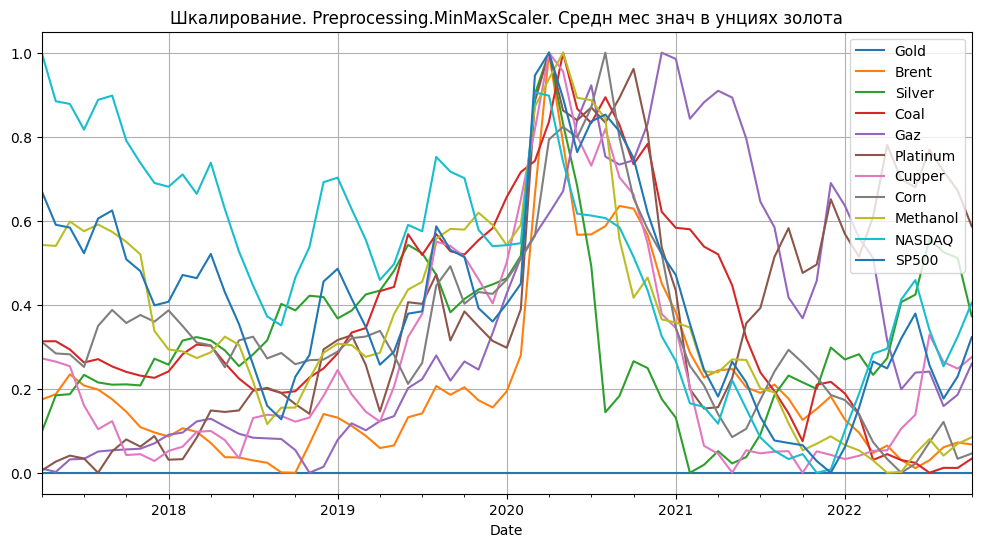

In [97]:
df4_scaler.plot(figsize=(12, 6), grid=True, title='Шкалирование. Preprocessing.MinMaxScaler. Средн мес знач в унциях золота')

In [100]:
# Средн мес знач приведены к барелю нефти

df5 = pd.DataFrame()

for column in df3.columns:
    df5[column] = df3['Brent'] / df3[column]
    

df5

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-30,0.04241,1.0,0.05558,0.01325,0.01858,0.00104,0.38666,0.00275,0.08032,0.00017,0.00042
2017-05-31,0.04133,1.0,0.05988,0.01352,0.01830,0.00108,0.39231,0.00273,0.08171,0.00016,0.00042
2017-06-30,0.03773,1.0,0.05921,0.01273,0.02046,0.00107,0.38433,0.00269,0.08581,0.00016,0.00041
2017-07-31,0.03967,1.0,0.06205,0.01200,0.02097,0.00109,0.36646,0.00265,0.08538,0.00016,0.00041
2017-08-31,0.04043,1.0,0.05910,0.01180,0.02155,0.00102,0.33798,0.00283,0.08359,0.00016,0.00041
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.06405,1.0,0.04653,0.00296,0.02544,0.00105,0.24283,0.00132,0.02534,0.00009,0.00026
2022-07-31,0.06053,1.0,0.05284,0.00260,0.02712,0.00116,0.29446,0.00151,0.02910,0.00009,0.00026
2022-08-31,0.05546,1.0,0.05104,0.00282,0.02191,0.00111,0.27663,0.00158,0.02608,0.00008,0.00024


<AxesSubplot: >

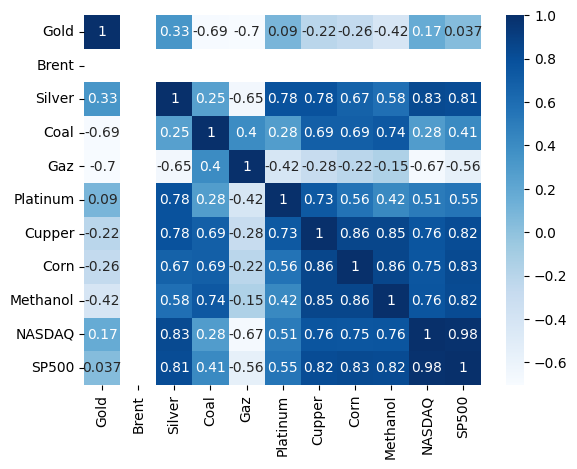

In [101]:
corr5 = df5.corr()

sns.heatmap(corr5, cmap='Blues', annot=True)

In [102]:
# Нормализовываю сренд мес знач в барелях нефти

ser5_scaler = scalerMMS.fit_transform(df5)

ser5_scaler

# DataFrame с нормализованными данными
df5_scaler = pd.DataFrame(ser5_scaler, index=df5.index)

df5_scaler.columns = ['Gold',	'Brent', 'Silver',	'Coal',	'Gaz',	'Platinum',	'Cupper',	'Corn',	'Methanol',	'NASDAQ','SP500']

df5_scaler

,Gold,Brent,Silver,Coal,Gaz,Platinum,Cupper,Corn,Methanol,NASDAQ,SP500
Date,,,,,,,,,,,
2017-04-30,0.52782,0.0,0.56409,0.46493,0.00575,0.43771,0.78668,0.79521,0.87196,1.00000,1.00000
2017-05-31,0.50650,0.0,0.68975,0.47669,0.00000,0.50972,0.81236,0.78075,0.89245,0.94454,0.96963
2017-06-30,0.43553,0.0,0.67009,0.44228,0.04471,0.50228,0.77610,0.75853,0.95315,0.91992,0.93806
2017-07-31,0.47391,0.0,0.75317,0.41005,0.05539,0.53394,0.69487,0.73831,0.94688,0.90295,0.92202
2017-08-31,0.48888,0.0,0.66695,0.40134,0.06742,0.40618,0.56542,0.83648,0.92035,0.89898,0.92034
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-30,0.95494,0.0,0.29991,0.01556,0.14805,0.45648,0.13298,0.02735,0.05808,0.22984,0.20275
2022-07-31,0.88545,0.0,0.48393,0.00000,0.18285,0.67545,0.36762,0.12861,0.11377,0.21535,0.19876
2022-08-31,0.78534,0.0,0.43151,0.00918,0.07482,0.58091,0.28658,0.16825,0.06902,0.15411,0.12648


<AxesSubplot: title={'center': 'Шкалирование. Preprocessing.MinMaxScaler. Средн мес знач барелях нефти'}, xlabel='Date'>

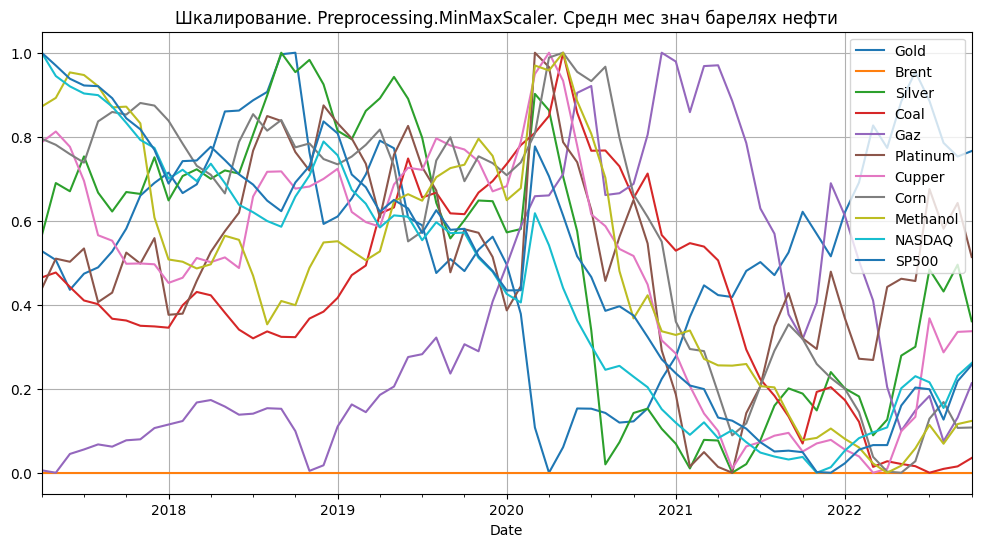

In [103]:
df5_scaler.plot(figsize=(12, 6), grid=True, title='Шкалирование. Preprocessing.MinMaxScaler. Средн мес знач барелях нефти')